# Ungraded Lab: Using more sophisticated images with Convolutional Neural Networks

In Course 1 of this specialization, you saw how to use a CNN to make your recognition of computer generated images of horses and humans more efficient. In this lesson, you'll take that to the next level: building a model to classify real images of cats and dogs. Like the horses and humans dataset, real-world images also come in different shapes, aspect ratios, etc. and you will need to take this into account when preparing your data.

In this lab, you will first review how to build CNNs, prepare your data with ImageDataGenerator and examine your results. You'll follow these steps:

Explore the example data of Dogs vs. Cats
Build and train a neural network to classify between the two pets
Evaluate the training and validation accuracy
You will build upon your results here in the next labs so you can improve it, particularly in avoiding overfitting. Let's begin!

IMPORTANT NOTE: This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [4]:
import zipfile

local_zip='datasets/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('datasets/')
zip_ref.close()

# Download and inspect Dataset

In [58]:
import os

base_dir =os.path.join('datasets/cats_and_dogs_filtered')
os.listdir(base_dir)
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [59]:
len(os.listdir(train_cats_dir)),len(os.listdir(train_dogs_dir)),len(os.listdir(validation_cats_dir)),len(os.listdir(validation_dogs_dir))

(1000, 1000, 500, 500)

In [60]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows=4
ncols=4

pic_index=0

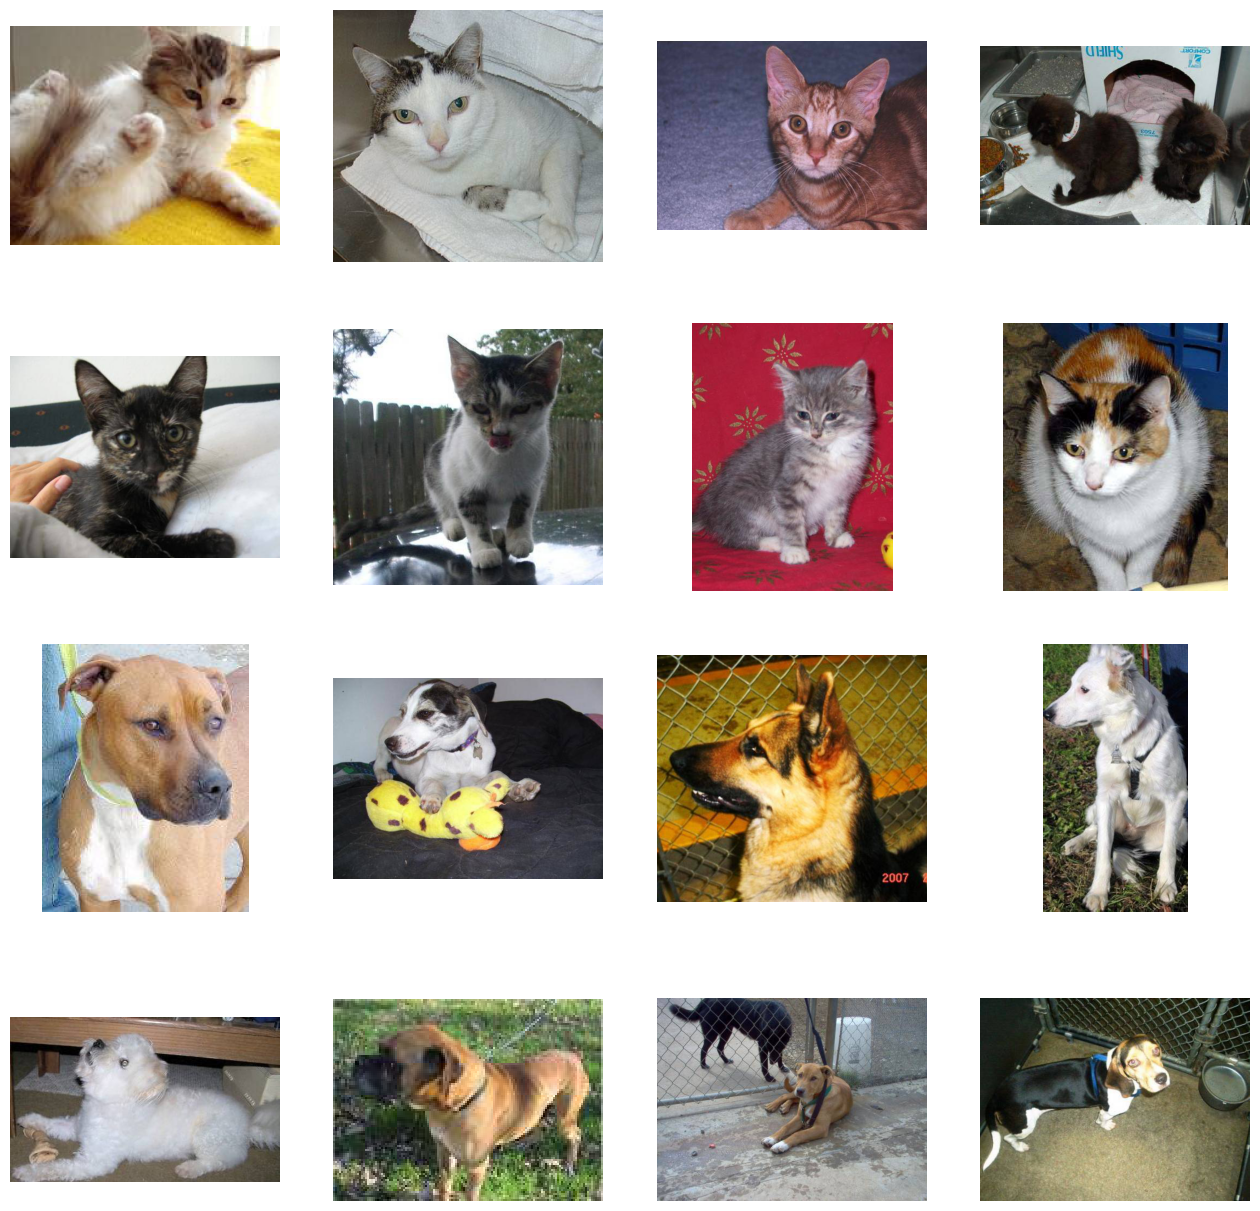

In [71]:
fig=plt.gcf()
fig.set_size_inches(4*nrows,ncols*4)

pic_index+=8
next_cat_pix=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)[pic_index-8:pic_index]]
next_dog_pix=[os.path.join(train_dogs_dir,fname) for fname in os.listdir(train_dogs_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img=mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

# building a model 

In [98]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [99]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 64)      

In [100]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])

# Data Preprocessing

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255.)
test_datagen=ImageDataGenerator(rescale=1.0/255.)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# training

In [102]:
history=model.fit(
    train_generator,
    # steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    verbose=1,
    # validation_steps=8
)

Epoch 1/10
100/100 [==============================] - 6s 59ms/step - loss: 0.7107 - accuracy: 0.5680 - val_loss: 0.6573 - val_accuracy: 0.6440
Epoch 2/10
100/100 [==============================] - 5s 54ms/step - loss: 0.6386 - accuracy: 0.6520 - val_loss: 0.6103 - val_accuracy: 0.6540
Epoch 3/10
100/100 [==============================] - 5s 55ms/step - loss: 0.5562 - accuracy: 0.7250 - val_loss: 0.6535 - val_accuracy: 0.6580
Epoch 4/10
100/100 [==============================] - 5s 54ms/step - loss: 0.4872 - accuracy: 0.7725 - val_loss: 0.5868 - val_accuracy: 0.6920
Epoch 5/10
100/100 [==============================] - 6s 55ms/step - loss: 0.3866 - accuracy: 0.8325 - val_loss: 0.8197 - val_accuracy: 0.6590
Epoch 6/10
100/100 [==============================] - 6s 56ms/step - loss: 0.3028 - accuracy: 0.8770 - val_loss: 0.6779 - val_accuracy: 0.6990
Epoch 7/10
100/100 [==============================] - 6s 61ms/step - loss: 0.2062 - accuracy: 0.9160 - val_loss: 0.8544 - val_accuracy: 0.6880

# model Prediction

In [97]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

image_directory='datasets/prediction/'
image_files=os.listdir(image_directory)
images=[]
for image_file in image_files:
    image_path=os.path.join(image_directory,image_file)
    image=load_img(image_path,target_size=(150,150))
    image_array=img_to_array(image)
    image_array/=255.0
    x=np.expand_dims(image_array,axis=0)
    images=np.vstack([x])
    classes=model.predict(images,batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(image_file + 'is a dog')
    else:
        print(image_file + 'is a cat')

1/1 [==============================] - 0s 66ms/step
[0.9973859]
cat1.jpgis a dog
1/1 [==============================] - 0s 18ms/step
[0.9997241]
cat2.jpgis a dog
1/1 [==============================] - 0s 17ms/step
[0.99981946]
cat3.jpgis a dog
1/1 [==============================] - 0s 17ms/step
[0.9997099]
dog1.jpgis a dog
1/1 [==============================] - 0s 17ms/step
[0.9265974]
dog2.jpegis a dog
1/1 [==============================] - 0s 18ms/step
[0.9803694]
dog3.jpgis a dog
1/1 [==============================] - 0s 17ms/step
[0.9997571]
dog4.jpegis a dog
1/1 [==============================] - 0s 17ms/step
[0.9992488]
dog5.jpgis a dog


# evaluation

Text(0.5, 1.0, 'Training and validation loss')

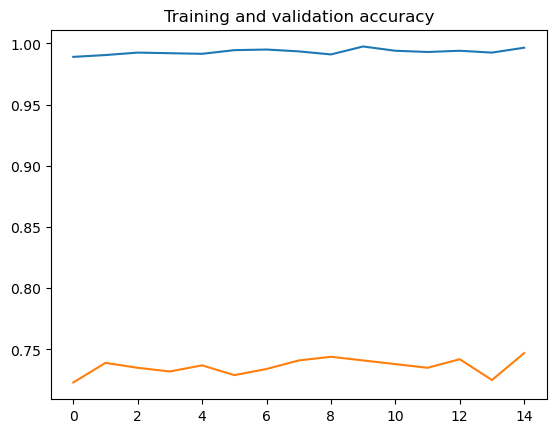

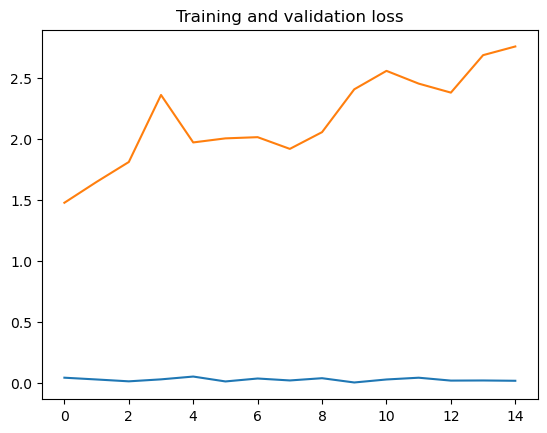

In [69]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

# Visualizing Intermediate Representations

In [70]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

NameError: name 'train_cat_fnames' is not defined